# Introduction to TensorFlow

## 1. Packages

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Normalization
from tensorflow.keras.activations import relu
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.random import set_seed

import numpy as np

2023-04-18 06:51:49.131107: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-18 06:51:49.284874: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 06:51:49.948999: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 06:51:49.953749: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 06:51:53.014461: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## 2. Create Model

In [32]:
# Create Random Dataset
np.random.seed(1)
x1 = np.round(np.random.rand(10,2)*10,2)
w_init = np.array([3,2])
y1 = np.dot(x1,w_init) + 5

In [36]:
print(x1)
print()
print(y1)
print()
print(x1.shape)
print(y1.shape)

[[4.17 7.2 ]
 [0.   3.02]
 [1.47 0.92]
 [1.86 3.46]
 [3.97 5.39]
 [4.19 6.85]
 [2.04 8.78]
 [0.27 6.7 ]
 [4.17 5.59]
 [1.4  1.98]]

[31.91 11.04 11.25 17.5  27.69 31.27 28.68 19.21 28.69 13.16]

(10, 2)
(10,)


In [34]:
# Menormalisasikan Data
norm = Normalization(axis=-1)
norm.adapt(x1)
x1n = norm(x1)
x1n

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1.1602794 ,  0.9180782 ],
       [-1.5040187 , -0.81759197],
       [-0.5648056 , -1.6895794 ],
       [-0.3156267 , -0.63488984],
       [ 1.0324953 ,  0.1665081 ],
       [ 1.1730578 ,  0.772747  ],
       [-0.20062108,  1.5741448 ],
       [-1.3315102 ,  0.71046215],
       [ 1.1602794 ,  0.24955463],
       [-0.6095301 , -1.2494334 ]], dtype=float32)>

In [83]:
set_seed(1)
model = Sequential([
    Dense(units=2,input_shape=[2],name='L1'),
    Dense(units=1,name='L2')
],name='my_model'
)

In [84]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 2)                 6         
                                                                 
 L2 (Dense)                  (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(
    optimizer='sgd',
    loss='mean_squared_error'
)

In [86]:
model.fit(x1n,y1,epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 729ms/step - loss: 545.9714
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 511.7396
Epoch 3/500
1/1 [==============================] - 0s 15ms/step - loss: 469.9601
Epoch 4/500
1/1 [==============================] - 0s 14ms/step - loss: 409.3540
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 318.8897
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 199.0177
Epoch 7/500
1/1 [==============================] - 0s 14ms/step - loss: 83.0136
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 19.3719
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 3.1443
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6057
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 0.1378
Epoch 12/500
1/1 [==============================] - 0s 14ms/step - loss: 0.0373
Epoch 13/500
1/1 [=================

In [116]:
# Menormalisasikan Data versi 2
x1n_2 = x1/10

In [117]:
model.fit(x1n_2,y1,epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 16ms/step - loss: 53.8693
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 43.6252
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 42.1731
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 40.7967
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 39.4755
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 38.2051
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 36.9813
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 35.8005
Epoch 9/500
1/1 [==============================] - 0s 20ms/step - loss: 34.6597
Epoch 10/500
1/1 [==============================] - 0s 14ms/step - loss: 33.5561
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 32.4871
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 31.4505
Epoch 13/500
1/1 [====================

In [123]:
x_test = np.array([[1,2],
                   [3,4]])

In [132]:
xn2_test = x_test/10

In [133]:
xn2_test

array([[0.1, 0.2],
       [0.3, 0.4]])

In [134]:
y_test_2 = model.predict(xn2_test)
y_test_2

1/1 [==============================] - 0s 37ms/step


array([[11.999779],
       [21.998531]], dtype=float32)

In [135]:
norm = Normalization(axis=-1)
norm.adapt(x_test)
xn1_test = norm(x_test)
xn1_test

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1., -1.],
       [ 1.,  1.]], dtype=float32)>

In [136]:
y_test_1 = model.predict(xn1_test)
y_test_1

1/1 [==============================] - 0s 68ms/step


array([[-44.994007],
       [ 54.993507]], dtype=float32)

In [129]:
y_pred = model.predict(x1n_2)
print(y_pred)

1/1 [==============================] - 0s 36ms/step
[[31.90913 ]
 [11.041723]
 [11.248473]
 [17.499634]
 [27.6882  ]
 [31.268871]
 [28.682882]
 [19.213787]
 [28.688076]
 [13.159255]]


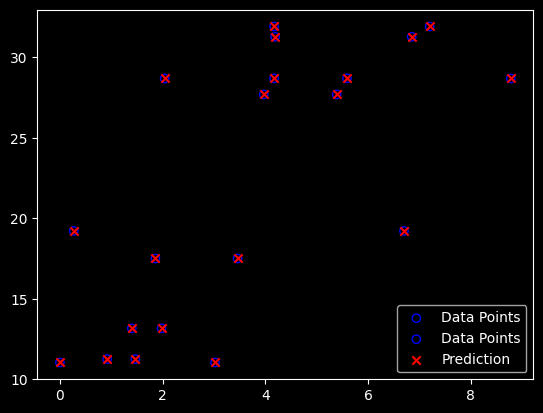

In [137]:
import matplotlib.pyplot as plt

plt.scatter(x1[:,0],y1,marker='o',facecolor='None',edgecolor='blue',lw=1,label='Data Points')
plt.scatter(x1[:,1],y1,marker='o',facecolor='None',edgecolor='blue',lw=1,label='Data Points')
plt.scatter(x1[:,0],y_pred,marker='x',c='r',label='Prediction')
plt.scatter(x1[:,1],y_pred,marker='x',c='r')

plt.legend()
plt.show()